<center>

# Atividade PAA - Avaliação experimental

</center>

Henricky de Lima Monteiro - 475075

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from typing import List
from random import seed,randint
from time import time

In [2]:
def GenerateData(lenghts):
    seed(42)
    return [ [ randint(0,100) for j in range(len)] for len in lenghts]

In [3]:
def bubleSort(A):
    for i in range(len(A)-1):
        for j in range(len(A)-1):
            if(A[j]>A[j+1]):
                aux = A[j]
                A[j]=A[j+1]
                A[j+1]=aux

In [4]:
def mergeSort(A):
    if(len(A)>1):
        mid = len(A)//2
        left = A[:mid]
        right = A[mid:]
        mergeSort(left)
        mergeSort(right)
        i=0
        j=0
        k=0
        while(i<len(left) and j<len(right)):
            if(left[i]<right[j]):
                A[k] = left[i]
                i+=1
            else:
                A[k]=right[j]
                j+=1
            k+=1
        while(i< len(left)):
            A[k]=left[i]
            i+=1
            k+=1
        while(j< len(right)):
            A[k]=right[j]
            j+=1
            k+=1

In [5]:
def recursive(n):
    if(n<=1): return 1
    else: return recursive(n-1)+recursive(n-1)

In [6]:
def GenerateDataByMethod(lenghts, n, method, name, inputTypeArray=True):
    f = open("{0}.txt".format(name),"w")
    for l in lenghts:
        res = 0
        for i in range(n):
            if(inputTypeArray):
                v = l.copy()
                ini = time()
                method(v)
                fin = time()
                res += fin-ini
            else:
                ini = time()
                method(l)
                fin = time()
                res += fin-ini
        res = (res/n)*1000
        param = len(l) if inputTypeArray else l
        print('close len {l} in {name} in {s: .2f}ms'.format(l= param,s=res,name=name))
        f.write("{l} {t:.2f}\n".format(l = param, t= res))
    f.close()

In [7]:
# lenghts = GenerateData([10,100,1000,2000,3000, 5000, 8000, 10000])
# n = 5
# GenerateDataByMethod(lenghts,n, bubleSort, 'bubleSort')
# lenghts = lenghts+ GenerateData([15000,20000,25000,30000,35000,40000])
# GenerateDataByMethod(lenghts,n, mergeSort, 'mergeSort')
# inputs = [i for i in range(12,28,2)]
# GenerateDataByMethod(inputs,n, recursive, 'recursive',inputTypeArray=False)



## Gerando os gráficos

In [8]:
def DrawGraphic(file, color='b'):
    title = file.replace('.txt','')
    A = np.loadtxt(file)
    x = [i[0] for i in A]
    y = [i[1] for i in A]
    plt.plot(x,y, 'o:',color=color, label=title)
    plt.title(title,fontweight='bold')
    plt.xlabel("Tamanho")
    plt.ylabel('Tempo (ms)')
    plt.legend()
    plt.show()
    

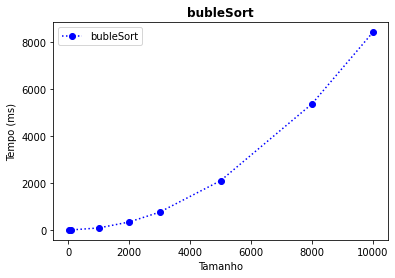

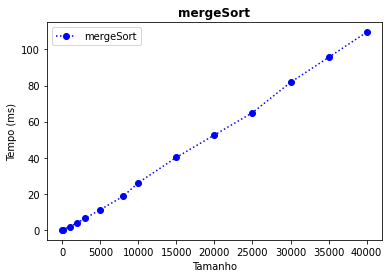

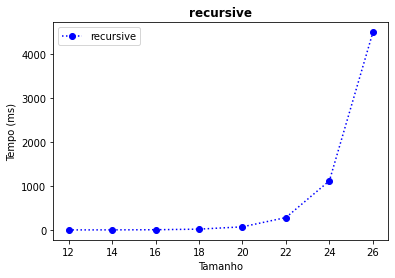

In [9]:
DrawGraphic('bubleSort.txt')
DrawGraphic('mergeSort.txt')
DrawGraphic('recursive.txt')
